In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf


In [4]:
symbol="ET"
df = yf.download(symbol, start="2024-01-01",auto_adjust=False)
data = df.xs('ET',axis=1,level='Ticker').reset_index()
data['100_day_MA'] = data['Close'].rolling(window=100).mean()

[*********************100%***********************]  1 of 1 completed


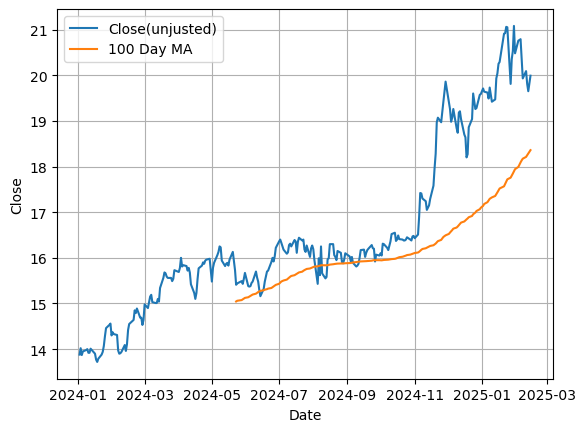

In [7]:
sns.lineplot(x='Date',y='Close',data=data,label="Close(unjusted)")
sns.lineplot(x='Date',y='100_day_MA',data=data,label="100 Day MA")
plt.legend()
plt.grid()
plt.show()

# working

Enter the function you want to calculate (bollinger, rsi, candlestick, all):  all
Enter the dataframe variable name:  data
Enter the column name for calculation:  Close


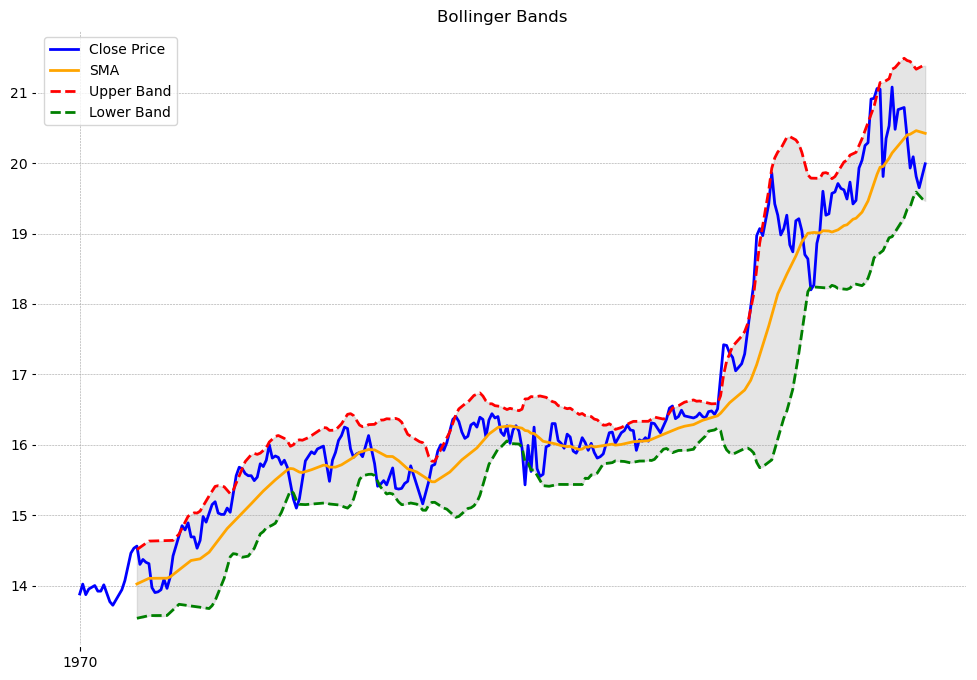

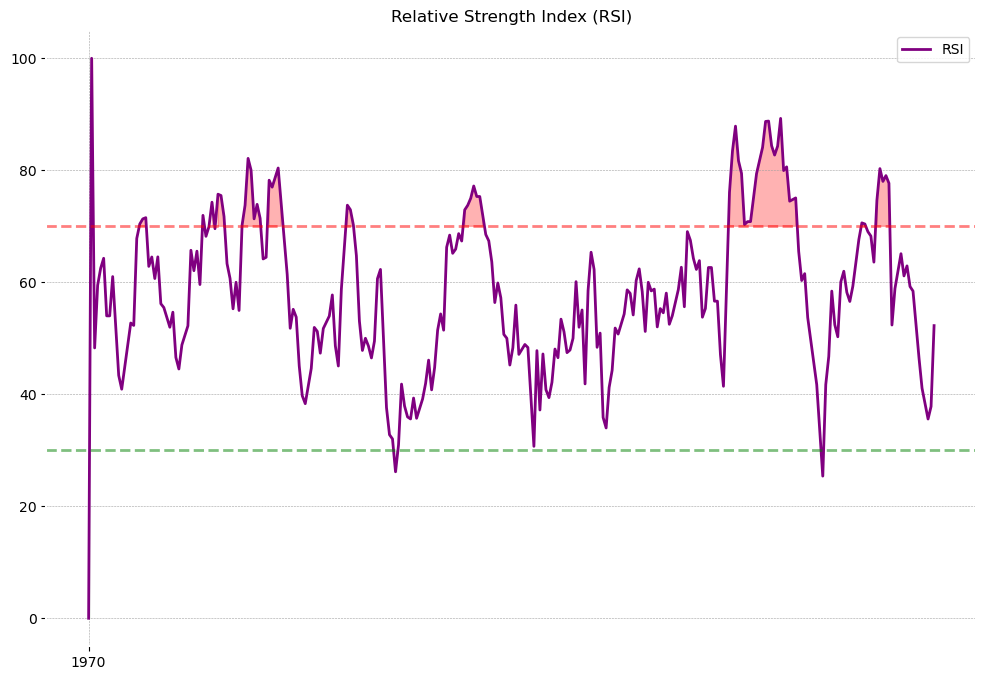

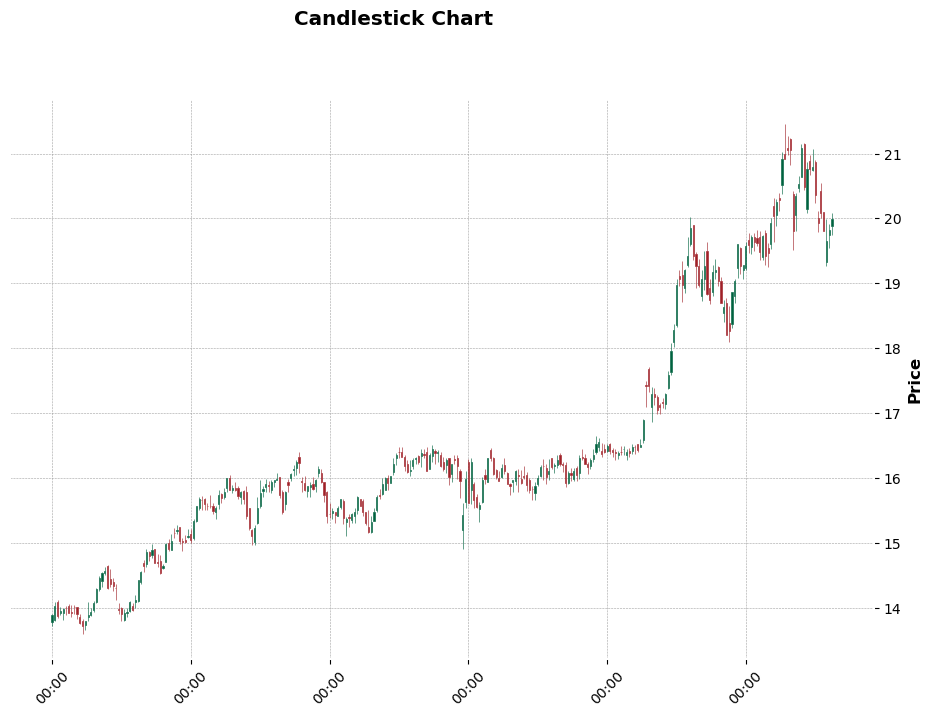

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf

def calculate_bollinger_bands(df, column, window=20, num_std=2):
    df['SMA'] = df[column].rolling(window=window).mean()
    df['Upper Band'] = df['SMA'] + (df[column].rolling(window=window).std() * num_std)
    df['Lower Band'] = df['SMA'] - (df[column].rolling(window=window).std() * num_std)
    
    plt.figure(figsize=(12,8))
    plt.plot(df[column], label='Close Price', color='blue')
    plt.plot(df['SMA'], label='SMA', color='orange')
    plt.plot(df['Upper Band'], label='Upper Band', linestyle='dashed', color='red')
    plt.plot(df['Lower Band'], label='Lower Band', linestyle='dashed', color='green')
    plt.fill_between(df.index, df['Upper Band'], df['Lower Band'], color='gray', alpha=0.2)
    plt.legend()
    plt.title('Bollinger Bands')
    plt.show()

def calculate_rsi(df, column, period=14):
    delta = df[column].diff(1)
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    
    gain_series = pd.Series(gain, index=df.index)
    loss_series = pd.Series(loss, index=df.index)
    
    avg_gain = gain_series.rolling(window=period, min_periods=1).mean()
    avg_loss = loss_series.rolling(window=period, min_periods=1).mean()
    
    rs = avg_gain / (avg_loss + 1e-10)  # Adding a small value to avoid division by zero
    df['RSI'] = 100 - (100 / (1 + rs))
    
    plt.figure(figsize=(12,8))
    plt.plot(df['RSI'], label='RSI', color='purple')
    plt.axhline(70, linestyle='dashed', color='red', alpha=0.5)
    plt.axhline(30, linestyle='dashed', color='green', alpha=0.5)
    plt.fill_between(df.index, df['RSI'], 70, where=(df['RSI'] >= 70), color='red', alpha=0.3)
    plt.fill_between(df.index, df['RSI'], 30, where=(df['RSI'] <= 30), color='green', alpha=0.3)
    plt.title('Relative Strength Index (RSI)')
    plt.legend()
    plt.show()

def plot_candlestick_chart(df):
    df = df[['Open', 'High', 'Low', 'Close']].copy()
    df.index = pd.to_datetime(df.index)  # Ensure the index is a DatetimeIndex
    mpf.plot(df, type='candle', style='charles', volume=False, title='Candlestick Chart', ylabel='Price', figsize=(12,8))

def run_all(df, column):
    calculate_bollinger_bands(df, column)
    calculate_rsi(df, column)
    plot_candlestick_chart(df)

def main():
    function_choice = input("Enter the function you want to calculate (bollinger, rsi, candlestick, all): ").strip().lower()
    df_name = input("Enter the dataframe variable name: ").strip()
    
    if df_name not in globals():
        print("Dataframe not found. Make sure the dataframe is loaded into the environment.")
        return
    
    df = globals()[df_name]
    df.index = pd.to_datetime(df.index)  # Ensure the index is a DatetimeIndex
    
    if function_choice in ['bollinger', 'rsi', 'all']:
        column = input("Enter the column name for calculation: ").strip()
        if column not in df.columns:
            print("Column not found in dataframe.")
            return
        if function_choice == 'bollinger':
            calculate_bollinger_bands(df, column)
        elif function_choice == 'rsi':
            calculate_rsi(df, column)
        elif function_choice == 'all':
            run_all(df, column)
    elif function_choice == 'candlestick':
        plot_candlestick_chart(df)
    else:
        print("Invalid function choice.")

if __name__ == "__main__":
    main()


# More Tweeks